Workshop: Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data

In [2]:
df = pd.read_csv('data/gdp4c.csv', index_col=0)
df.head()

,SGP,THA,USA,VNM
1960,704462302.4,2.760747e+09,5.433000e+11,NaN
1961,764308114.5,3.034044e+09,5.633000e+11,NaN
1962,825885273.7,3.308913e+09,6.051000e+11,NaN
1963,917222004.4,3.540403e+09,6.386000e+11,NaN
1964,893734483.2,3.889130e+09,6.858000e+11,NaN


In [3]:
df.tail()

,SGP,THA,USA,VNM
2013,3.044540e+11,4.203330e+11,1.669150e+13,1.712220e+11
2014,3.115390e+11,4.073390e+11,1.742760e+13,1.862050e+11
2015,3.040980e+11,4.013990e+11,1.812070e+13,1.932410e+11
2016,3.097640e+11,4.117550e+11,1.862450e+13,2.052760e+11
2017,3.239070e+11,4.552210e+11,1.939060e+13,2.238640e+11


In [4]:
df.describe()

,SGP,THA,USA,VNM
count,5.800000e+01,5.800000e+01,5.800000e+01,3.300000e+01
mean,8.043585e+10,1.227440e+11,6.991516e+12,6.878553e+10
std,1.007247e+11,1.353708e+11,5.857794e+12,6.664636e+10
min,7.044623e+08,2.760747e+09,5.433000e+11,6.293305e+09
25%,5.320927e+09,1.399794e+10,1.583852e+12,2.465747e+10
50%,2.788040e+10,6.695904e+10,5.455160e+12,3.506411e+10
75%,9.937334e+10,1.719910e+11,1.137740e+13,1.060150e+11
max,3.239070e+11,4.552210e+11,1.939060e+13,2.238640e+11


In [5]:
df.shape

(58, 4)

In [6]:
df.isnull().sum()

SGP     0
THA     0
USA     0
VNM    25
dtype: int64

Data Visualization

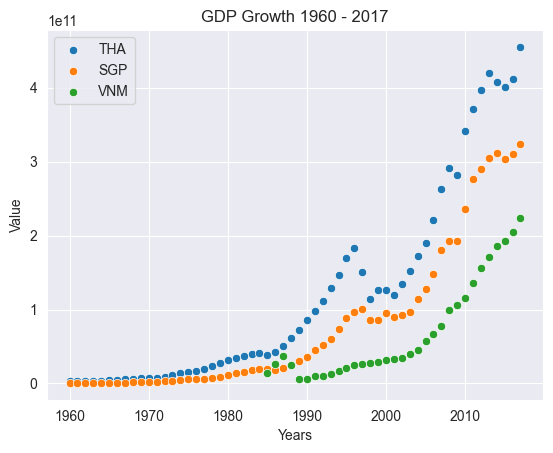

In [7]:
sns.set_style('darkgrid')
sns.scatterplot(x=df.index, y=df.THA, label='THA')
sns.scatterplot(x=df.index, y=df.SGP, label='SGP')
sns.scatterplot(x=df.index, y=df.VNM, label='VNM')
plt.title('GDP Growth 1960 - 2017')
plt.ylabel('Value')
plt.xlabel('Years')
plt.show()

Model: Polynomial Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [9]:
x_data = df.index
x_data

Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype='int64')

In [10]:
x_data = np.array(x_data).reshape(-1,1)
x_data

array([[1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017]])

In [11]:
y_data = df.THA
y_data

1960    2.760747e+09
1961    3.034044e+09
1962    3.308913e+09
1963    3.540403e+09
1964    3.889130e+09
1965    4.388938e+09
1966    5.279231e+09
1967    5.638461e+09
1968    6.081009e+09
1969    6.695337e+09
1970    7.086538e+09
1971    7.375000e+09
1972    8.177885e+09
1973    1.083859e+10
1974    1.370300e+10
1975    1.488275e+10
1976    1.698521e+10
1977    1.977932e+10
1978    2.400657e+10
1979    2.737170e+10
1980    3.235344e+10
1981    3.484611e+10
1982    3.658980e+10
1983    4.004283e+10
1984    4.179759e+10
1985    3.890069e+10
1986    4.309675e+10
1987    5.053544e+10
1988    6.166720e+10
1989    7.225088e+10
1990    8.534306e+10
1991    9.823470e+10
1992    1.114530e+11
1993    1.288900e+11
1994    1.466830e+11
1995    1.692790e+11
1996    1.830350e+11
1997    1.501800e+11
1998    1.136760e+11
1999    1.266690e+11
2000    1.263920e+11
2001    1.202970e+11
2002    1.343010e+11
2003    1.522810e+11
2004    1.728950e+11
2005    1.893180e+11
2006    2.217580e+11
2007    2.629

In [12]:
polyFeature = PolynomialFeatures(degree=2)
x_poly = polyFeature.fit_transform(x_data)
x_poly

array([[1.000000e+00, 1.960000e+03, 3.841600e+06],
       [1.000000e+00, 1.961000e+03, 3.845521e+06],
       [1.000000e+00, 1.962000e+03, 3.849444e+06],
       [1.000000e+00, 1.963000e+03, 3.853369e+06],
       [1.000000e+00, 1.964000e+03, 3.857296e+06],
       [1.000000e+00, 1.965000e+03, 3.861225e+06],
       [1.000000e+00, 1.966000e+03, 3.865156e+06],
       [1.000000e+00, 1.967000e+03, 3.869089e+06],
       [1.000000e+00, 1.968000e+03, 3.873024e+06],
       [1.000000e+00, 1.969000e+03, 3.876961e+06],
       [1.000000e+00, 1.970000e+03, 3.880900e+06],
       [1.000000e+00, 1.971000e+03, 3.884841e+06],
       [1.000000e+00, 1.972000e+03, 3.888784e+06],
       [1.000000e+00, 1.973000e+03, 3.892729e+06],
       [1.000000e+00, 1.974000e+03, 3.896676e+06],
       [1.000000e+00, 1.975000e+03, 3.900625e+06],
       [1.000000e+00, 1.976000e+03, 3.904576e+06],
       [1.000000e+00, 1.977000e+03, 3.908529e+06],
       [1.000000e+00, 1.978000e+03, 3.912484e+06],
       [1.000000e+00, 1.979000e

In [13]:
model = LinearRegression()
model.fit(x_poly, y_data)

LinearRegression()

Evaluation

In [14]:
model.score(x_poly, y_data)

0.9579681384317786

Visualize Model

In [15]:
y_prediction = model.predict(x_poly)
y_prediction

array([2.52374158e+10, 2.10451846e+10, 1.72608202e+10, 1.38843228e+10,
       1.09156923e+10, 8.35492869e+09, 6.20203200e+09, 4.45700222e+09,
       3.11983935e+09, 2.19054339e+09, 1.66911433e+09, 1.55555219e+09,
       1.84985696e+09, 2.55202864e+09, 3.66206723e+09, 5.17997273e+09,
       7.10574513e+09, 9.43938445e+09, 1.21808907e+10, 1.53302638e+10,
       1.88875039e+10, 2.28526108e+10, 2.72255847e+10, 3.20064255e+10,
       3.71951332e+10, 4.27917078e+10, 4.87961493e+10, 5.52084577e+10,
       6.20286330e+10, 6.92566752e+10, 7.68925844e+10, 8.49363604e+10,
       9.33880034e+10, 1.02247513e+11, 1.11514890e+11, 1.21190134e+11,
       1.31273244e+11, 1.41764222e+11, 1.52663066e+11, 1.63969778e+11,
       1.75684356e+11, 1.87806801e+11, 2.00337113e+11, 2.13275292e+11,
       2.26621338e+11, 2.40375251e+11, 2.54537030e+11, 2.69106677e+11,
       2.84084191e+11, 2.99469571e+11, 3.15262818e+11, 3.31463933e+11,
       3.48072914e+11, 3.65089762e+11, 3.82514477e+11, 4.00347059e+11,
      

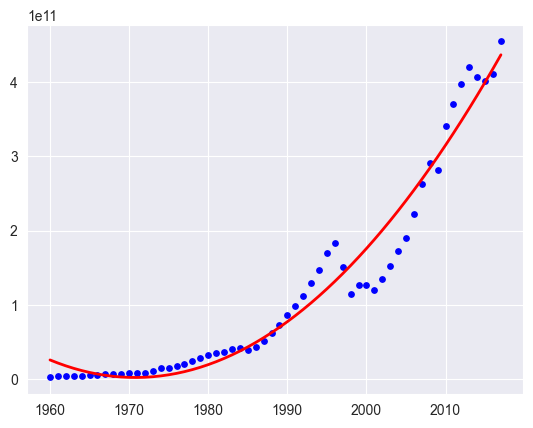

In [16]:
plt.scatter(x_data, y_data, color='b', s=15)
plt.plot(x_data, y_prediction, linewidth='2', color='r')
plt.show()

Prediction

In [17]:
x_input = [2010,2015,2017,2020,2023]
x_input = np.array(x_input).reshape(-1,1)
x_input

array([[2010],
       [2015],
       [2017],
       [2020],
       [2023]])

In [18]:
x_input_poly = polyFeature.fit_transform(x_input)
y_predict_result = model.predict(x_input_poly)
y_predict_result

array([3.15262818e+11, 4.00347059e+11, 4.37235823e+11, 4.95627972e+11,
       5.57690923e+11])

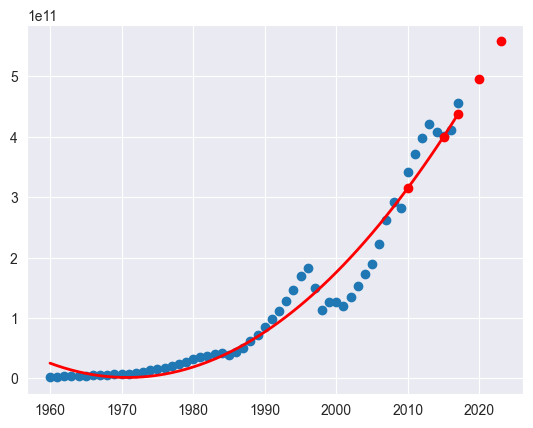

In [19]:
plt.scatter(x_data, y_data)
plt.plot(x_data, y_prediction, linewidth='2', color='r')
plt.scatter(x_input, y_predict_result, color='r')